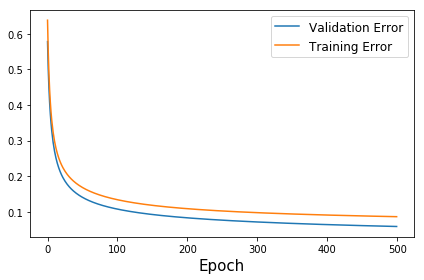

0.9824561403508771 0.9523809523809523 1.0


In [9]:
"""Main Cell with best learning rate (0.01) and epoch set to 500. Prints accuracy, precision and recall."""

import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#loading dataset
data = pd.read_csv("wdbc.dataset")

#dropping column 842302(index)
del data['842302']

# a function to normalize an individual list
def normalize_eachlist(list1):
    
    list1=list1.tolist()
    
    maxi=0
    mini=0
    
    maxi=max(list1)
    mini=min(list1)
    #xnew=x-xmin/xmax-xmin
            
    for i in range(len(list1)):
        list1[i]=(list1[i]-mini)/(maxi-mini)
        
        
    return list1

# To normalize each feature of dataset
def normalize(dataset):
    data_list=[]
    data_list.append(dataset.iloc[:,0].tolist())
    #Excluding the first column since it stores the class label
    for i in range (1,dataset.shape[1]):
        list1=dataset.iloc[:,i]
        data_list.append(normalize_eachlist(list1))
        
    #changing back to dataframe from list of lists
    dataset=pd.DataFrame(data_list)
    dataset=dataset.transpose()
    return dataset

data=normalize(data)

#Split the data set into 80% training, 10% testing and 10% validation
train,test = train_test_split(data, test_size=0.2)
test,validation=train_test_split(test, test_size=0.5)

# w is for weight which is initialiazing a weight list with random chosen value along with bias
w=[]
for i in range (train.shape[1]):
    a=(random.uniform(0,0.05))
    w.append(a)

#def for sigmoid activation function
def logis(x):
    a=1/(1+np.exp(-x))
    a=np.minimum(a,0.99999) # setting a lower bound
    a=np.maximum(a,0.00001) # setting an upper bound,These are done to prevent getting a nan value in the entropy error
    return a

# a function returning element wise dot-product for two lists
def dotpro(list1,list2):
    x=0
    for i in range(len(list1)):
        x=x+list1[i]*list2[i]
        
    return x

#training function starts
te_list=[] #training error list
ve_list=[] #validation error list
epoc=500
def training(train,w,l_rate,epoc):

    #assuming M=1,B=0
    target=train.iloc[:,0].tolist()
    for x in range(len(target)):
        if (target[x]=='M'):
            target[x]=1
        else:
            target[x]=0
    
###################################    
    
    parameter_epoc=epoc
    training_error=0
    

    while(epoc>0):
        training_error=0
    
    
        for i in range((train.shape[0])):
            x=0
            l=train.iloc[i,1:]
            l=l.tolist()
            l=[1]+l  #adding 1 to each input vector to multiply with the bias
            x=dotpro(l,w)
            x=logis(x)
            err=x-target[i] #difference between my prediction and actual label
            training_error+=-((target[i]*np.log(x))+((1-target[i])*np.log(1-x))) #cross entropy error
            
            #updating weights....
            for j in range((len(w))):
                w[j]=w[j]-l_rate*l[j]*err
        
        training_error=training_error/(train.shape[0])
        te_list.append(training_error)
        ve_list.append(validation_func(validation,w))
        epoc=epoc-1
        
    plotting(parameter_epoc,l_rate) #plot validation and training error vs epoch
    
    return w
#########################################
#testing function start        
def testing(test,w):
    e=0
    c=0 
    tp=0
    class1=class0=org_class1=org_class0=0
    
    #target_test stores the target labels of the test set  
    target_test=test.iloc[:,0].tolist()
    for x in range(len(target_test)):
        if (target_test[x]=='M'):
            target_test[x]=1
            org_class1+=1 #counting number of actual class 1
            
        else:
            target_test[x]=0
            org_class0+=1  #counting number of actual class 0
        
        
    for i in range((test.shape[0])):
        x=0
        l=test.iloc[i,1:]
        l=l.tolist()
        l=[1]+l
        x=dotpro(l,w)
        x=logis(x)
        #if x is greater then 0.5 we assign to class M 
        if(x>=0.5):
            x=1
            class1+=1 #counting number of predicted class 1
        else:
            x=0
            class0+=1 #counting number of predicted class 0
            
        if (x==target_test[i]):
            if(x==1):
                tp+=1 #true positive, intersected between class 1 of my predicted and actual labels
            c=c+1
            #c is the no of hits or when my predictions were correct
        else:
            e=e+1
            #e is no of errors
            
    accuracy=c/(e+c)
    precision=tp/class1
    recall=tp/org_class1        
            
    return accuracy,precision,recall

#validation function starts
def validation_func(validation,w):
    e=0
    
    #target_test stores the target labels of the validation set   
    target_test=validation.iloc[:,0].tolist()
    for x in range(len(target_test)):
        if (target_test[x]=='M'):
            target_test[x]=1
            
            
        else:
            target_test[x]=0
            
        
        
    for i in range((validation.shape[0])):
        x=0
        l=validation.iloc[i,1:]
        l=l.tolist()
        l=[1]+l
        x=dotpro(l,w)
        x=logis(x)
        e+=-((target_test[i]*np.log(x))+((1-target_test[i])*np.log(1-x))) #cross entropy error
    e=e/validation.shape[0]
    return e

"Graph Plotting"

def plotting(epoch,eta):
    xaxis = np.arange(epoch)
    plt.plot(xaxis,ve_list)
    plt.plot(xaxis,te_list)
    plt.xlabel('Epoch',fontsize=15)
    plt.legend(['Validation Error','Training Error'], loc='upper right',fontsize=12)
    plt.tight_layout()
    plt.savefig('Training_Val_Error'+str(epoch)+'_'+str(eta)+'.png')
    plt.show()

#getting weights from training function
weight=training(train,w,0.01,epoc)
#using the weights from training to check in the test and calculate the metrics
accuracy,precision,recall=testing(test,weight)

print(accuracy,precision,recall)  
    


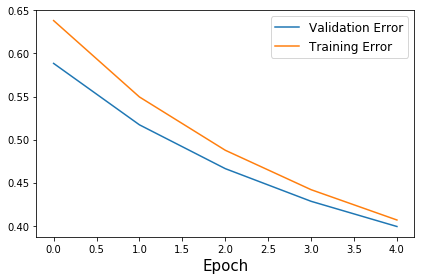

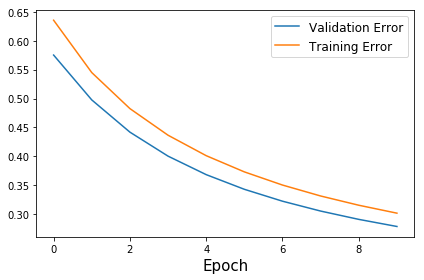

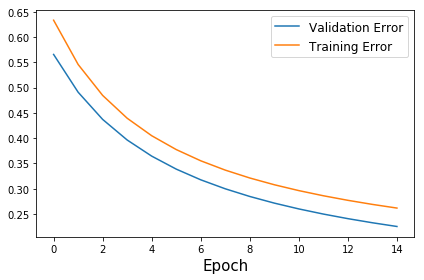

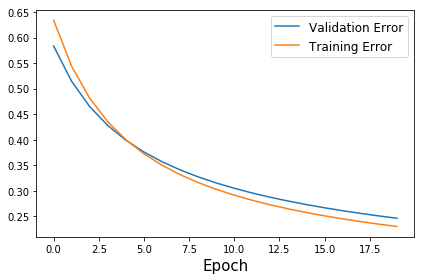

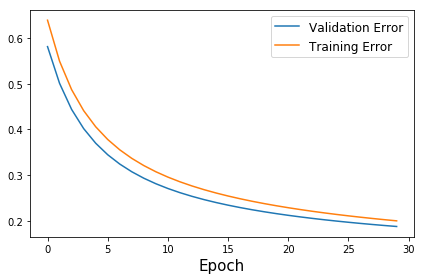

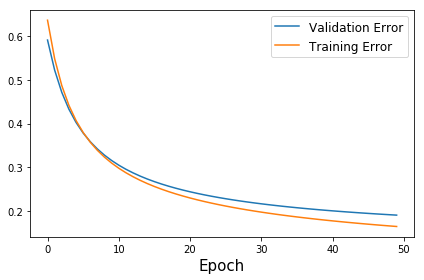

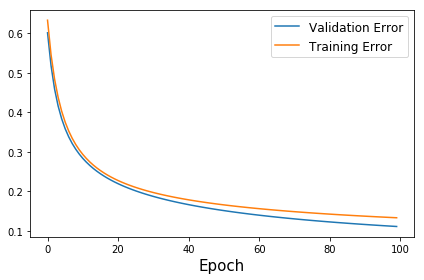

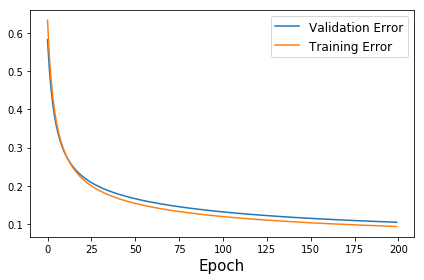

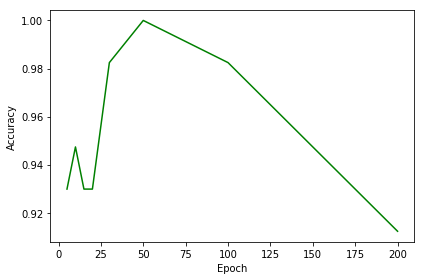

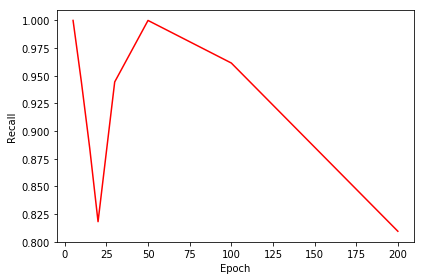

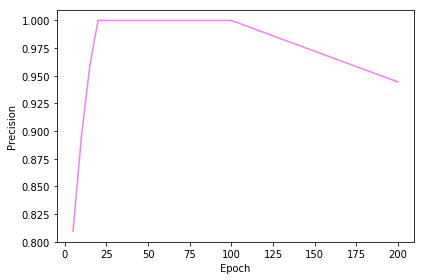

In [11]:
"Comparing accuracy, precision and recall for different epoch"
def acc_prec_rec(a,p,r,e):
    
    plt.plot(e,a,color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

    plt.plot(e,r,color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.tight_layout()
    plt.show()

    plt.plot(e,p,color='violet')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.tight_layout()
    plt.show()


epoch_list=[5,10,15,20,30,50,100,200]
acc_list=[]
recall_list=[]
prec_list=[]
for e in epoch_list:
    train,test = train_test_split(data, test_size=0.2)
    test,validation=train_test_split(test, test_size=0.5)

    w=[]
    for i in range (train.shape[1]):
        a=(random.uniform(0,0.05))
        w.append(a)
    te_list=[]
    ve_list=[]
    w=training(train,w,0.01,e)
    a,p,r=testing(test,w)
    acc_list.append(a)
    prec_list.append(p)
    recall_list.append(r)

acc_prec_rec(acc_list,prec_list,recall_list,epoch_list)

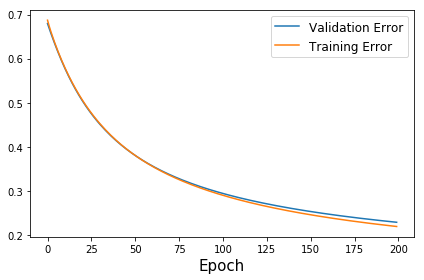

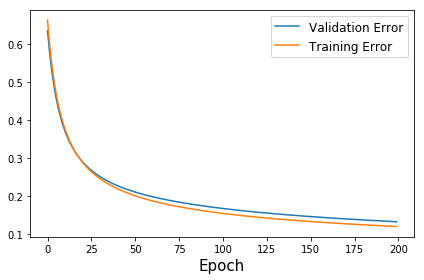

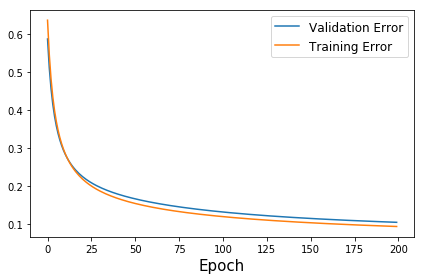

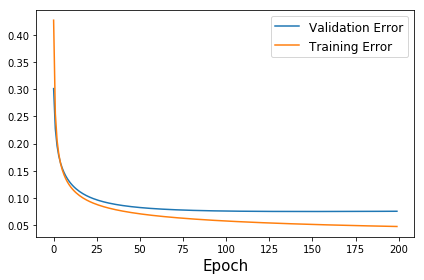

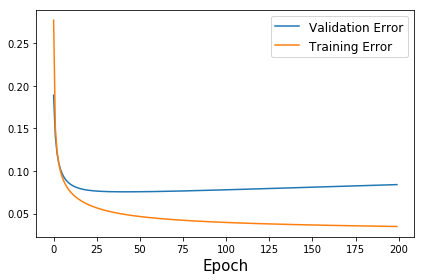

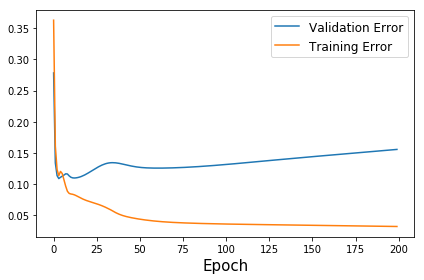

In [12]:
"Comparing Learning Rates"

list_lrate=[0.001,0.005,0.01,0.1,0.5,3]
for l in list_lrate:
    te_list=[]
    ve_list=[]
    w=[]
    for i in range (train.shape[1]):
        a=(random.uniform(0,0.01))
        w.append(a)
    training(train,w,l,200)